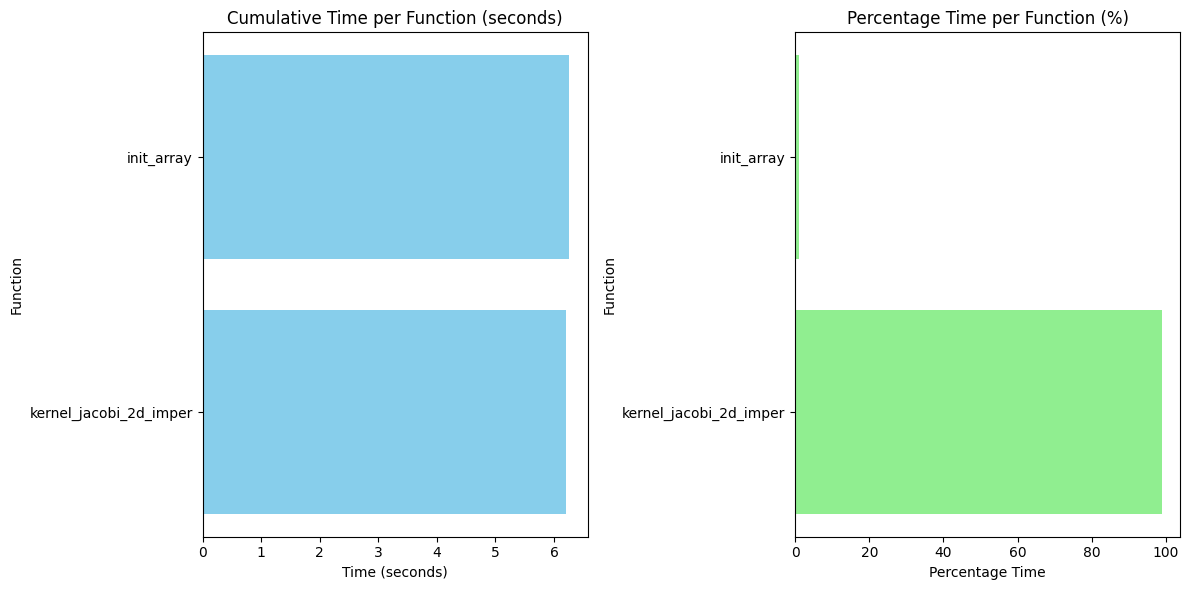

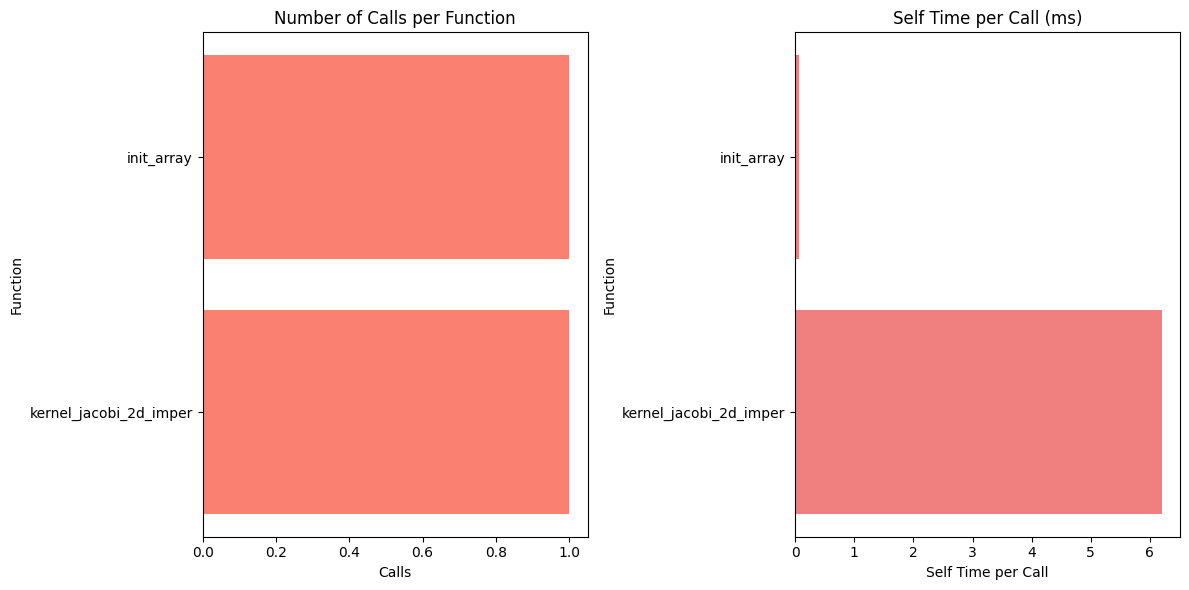

Potential Parallelization Candidates:
            function_name  cumulative_seconds  calls
1              init_array                6.26      1
0  kernel_jacobi_2d_imper                6.20      1
Potential CPU-bound Functions:
            function_name  self_seconds
0  kernel_jacobi_2d_imper          6.20
1              init_array          0.06


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import json

# Load the JSON data
with open('profiling_large_sequential.json', 'r') as f:
    data = f.read()
profile_data = json.loads(data)

# Convert the data into a DataFrame for easier manipulation
flat_profile = profile_data["flat_profile"]
df = pd.DataFrame(flat_profile)

# Convert the relevant columns to numeric values for analysis
df['percentage_time'] = pd.to_numeric(df['percentage_time'], errors='coerce')
df['cumulative_seconds'] = pd.to_numeric(df['cumulative_seconds'], errors='coerce')
df['self_seconds'] = pd.to_numeric(df['self_seconds'], errors='coerce')
df['calls'] = pd.to_numeric(df['calls'], errors='coerce')
df['self_time_per_call'] = pd.to_numeric(df['self_time_per_call'], errors='coerce')

# Plot Time Spent on Each Function (Cumulative Seconds and Percentage Time)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Cumulative Time Plot
ax[0].barh(df['function_name'], df['cumulative_seconds'], color='skyblue')
ax[0].set_title('Cumulative Time per Function (seconds)')
ax[0].set_xlabel('Time (seconds)')
ax[0].set_ylabel('Function')

# Percentage Time Plot
ax[1].barh(df['function_name'], df['percentage_time'], color='lightgreen')
ax[1].set_title('Percentage Time per Function (%)')
ax[1].set_xlabel('Percentage Time')
ax[1].set_ylabel('Function')

plt.tight_layout()
plt.show()

# Plot Calls and Self Time per Call
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot for number of calls
ax[0].barh(df['function_name'], df['calls'], color='salmon')
ax[0].set_title('Number of Calls per Function')
ax[0].set_xlabel('Calls')
ax[0].set_ylabel('Function')

# Plot for self time per call
ax[1].barh(df['function_name'], df['self_time_per_call'], color='lightcoral')
ax[1].set_title('Self Time per Call (ms)')
ax[1].set_xlabel('Self Time per Call')
ax[1].set_ylabel('Function')

plt.tight_layout()
plt.show()

# Potential parallelization candidates: High cumulative time, frequent calls
potential_parallel = df[df['cumulative_seconds'] > 0.01].sort_values(by='cumulative_seconds', ascending=False)

# Displaying functions that may benefit from parallelization
print("Potential Parallelization Candidates:")
print(potential_parallel[['function_name', 'cumulative_seconds', 'calls']])

# Identifying CPU-bound functions (those with high self-time)
cpu_bound = df[df['self_seconds'] > 0.01].sort_values(by='self_seconds', ascending=False)

# Displaying CPU-bound functions
print("Potential CPU-bound Functions:")
print(cpu_bound[['function_name', 'self_seconds']])


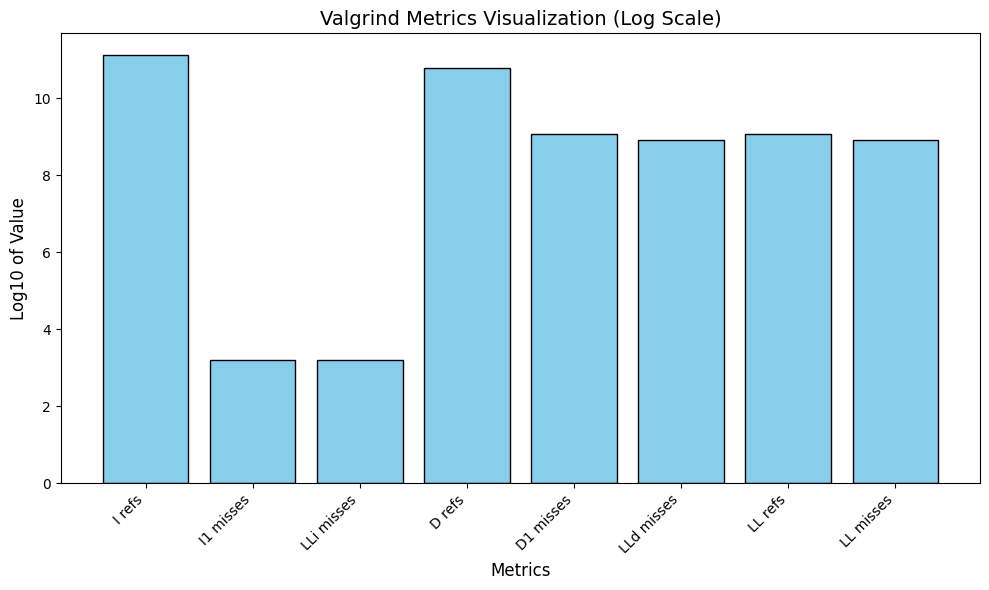

'\n Events    : Ir Dr Dw I1mr D1mr D1mw ILmr DLmr DLmw\n==1376== Collected : 135033716633 56228628188 6451658124 1608 800222716 403833071 1600 400426014 403801063\n==1376==\n==1376== I   refs:      135,033,716,633\n==1376== I1  misses:              1,608\n==1376== LLi misses:              1,600\n==1376== I1  miss rate:            0.00%\n==1376== LLi miss rate:            0.00%\n==1376==\n==1376== D   refs:       62,680,286,312  (56,228,628,188 rd + 6,451,658,124 wr)\n==1376== D1  misses:      1,204,055,787  (   800,222,716 rd +   403,833,071 wr)\n==1376== LLd misses:        804,227,077  (   400,426,014 rd +   403,801,063 wr)\n==1376== D1  miss rate:             1.9% (           1.4%   +           6.3%  )\n==1376== LLd miss rate:             1.3% (           0.7%   +           6.3%  )\n==1376==\n==1376== LL refs:         1,204,057,395  (   800,224,324 rd +   403,833,071 wr)\n==1376== LL misses:         804,228,677  (   400,427,614 rd +   403,801,063 wr)\n==1376== LL miss rate:          

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Data extracted from the Valgrind output
categories = [
    "I refs", "I1 misses", "LLi misses",
    "D refs", "D1 misses", "LLd misses",
    "LL refs", "LL misses"
]

values = [
    135033716633, 1608, 1600, 
    62680286312, 1204055787, 804227077, 
    1204057395, 804228677
]

# Normalize values for better visualization in a bar chart
normalized_values = np.log10(values)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(categories, normalized_values, color="skyblue", edgecolor="black")
plt.xticks(rotation=45, ha='right')
plt.title("Valgrind Metrics Visualization (Log Scale)", fontsize=14)
plt.ylabel("Log10 of Value", fontsize=12)
plt.xlabel("Metrics", fontsize=12)
plt.tight_layout()
plt.show()
("""
 Events    : Ir Dr Dw I1mr D1mr D1mw ILmr DLmr DLmw
==1376== Collected : 135033716633 56228628188 6451658124 1608 800222716 403833071 1600 400426014 403801063
==1376==
==1376== I   refs:      135,033,716,633
==1376== I1  misses:              1,608
==1376== LLi misses:              1,600
==1376== I1  miss rate:            0.00%
==1376== LLi miss rate:            0.00%
==1376==
==1376== D   refs:       62,680,286,312  (56,228,628,188 rd + 6,451,658,124 wr)
==1376== D1  misses:      1,204,055,787  (   800,222,716 rd +   403,833,071 wr)
==1376== LLd misses:        804,227,077  (   400,426,014 rd +   403,801,063 wr)
==1376== D1  miss rate:             1.9% (           1.4%   +           6.3%  )
==1376== LLd miss rate:             1.3% (           0.7%   +           6.3%  )
==1376==
==1376== LL refs:         1,204,057,395  (   800,224,324 rd +   403,833,071 wr)
==1376== LL misses:         804,228,677  (   400,427,614 rd +   403,801,063 wr)
==1376== LL miss rate:              0.4% (           0.2%   +           6.3%  )
""")

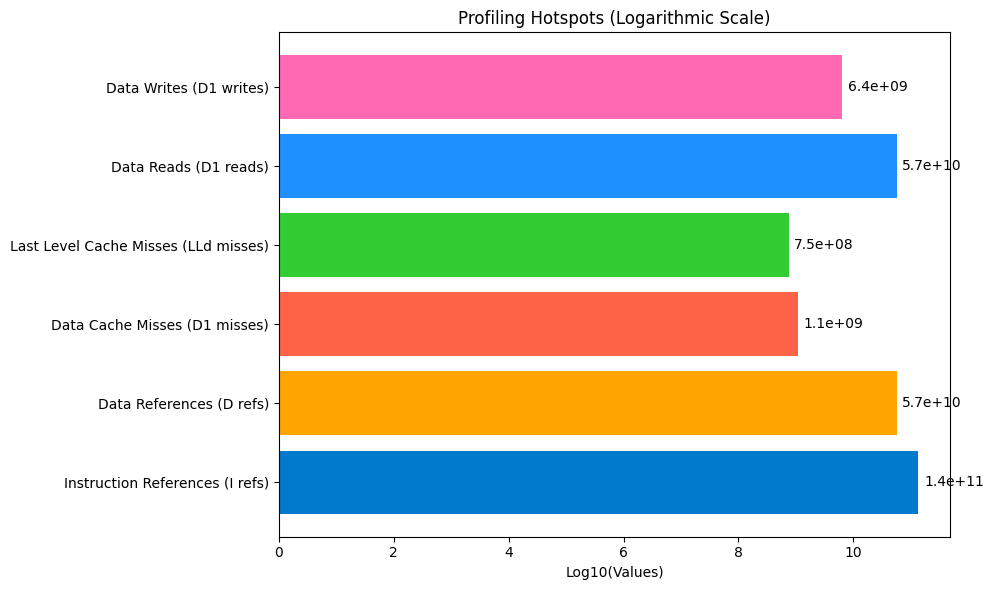

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Data from Valgrind metrics
categories = [
    "Instruction References (I refs)",
    "Data References (D refs)",
    "Data Cache Misses (D1 misses)",
    "Last Level Cache Misses (LLd misses)",
    "Data Reads (D1 reads)",
    "Data Writes (D1 writes)",
]

values = [
    135_328_345_500,  # I refs
    56_643_536_710,   # D refs
    1_088_600_043,    # D1 misses
    745_543_312,      # LLd misses
    56_643_536_710,   # D1 reads
    6_422_648_974,    # D1 writes
]

# Convert to logarithmic scale for better visualization
log_values = np.log10(values)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(categories, log_values, color=["#007acc", "#ffa500", "#ff6347", "#32cd32", "#1e90ff", "#ff69b4"])

# Adding data labels
for bar, val in zip(bars, values):
    ax.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, f"{val:.1e}", va="center")

# Labels and title
ax.set_xlabel("Log10(Values)")
ax.set_title("Profiling Hotspots (Logarithmic Scale)")
plt.tight_layout()
plt.show()
